# Machine Failure Prediction Based on Environmental Factors

The dataset records various parameters associated with weather conditions and location, including temperature, wind direction, speed, and atmospheric pressure, among others. The target variable is "Failure_today," indicating whether a machine failure occurred on a given day. The features encompass meteorological and environmental factors, such as temperature, wind, and pressure, along with historical failure data ("Fail_tomorrow"). The challenge involves predicting machine failures ("Failure_today") based on these parameters, providing valuable insights for preventive maintenance. The "RISK_MM" variable may serve as an additional risk indicator. The dataset covers a range of dates, allowing for a time-series analysis to identify patterns and trends influencing machine failures over time.


Metric 1: Classification Accuracy

* KNN = 0.8283
* Random Forest = 0.8521
* Decision Tree = 0.8315
* Logistic Regression = 0.8292

Metric 2: Precision

* KNN = 0.6461
* Random Forest = 0.7285
* Decision Tree = 0.6701
* Logistic Regression = 0.6683

Metric 3: Recall

* Random Forest = 0.5265
* Decision Tree = 0.4671
* KNN = 0.4924
* Logistic Regression = 0.4502

Metric 4: F1 Score

* Random Forest = 0.6112
* Decision Tree = 0.5505
* KNN = 0.5589
* Logistic Regression = 0.5380


# Growth/Next Steps
While predictive accuracy was relatively high - other modelling approaches could be tested, especially those somewhat similar to Random Forest, for example XGBoost, LightGBM to see if even more accuracy could be gained.

From a data point of view, further variables could be collected, and further feature engineering could be undertaken to ensure that we have as much useful information available for predicting whether the machine fails today.

# Logistic Regression

We utlise the scikit-learn library within Python to model our data using Logistic Regression. The code sections below are broken up into 5 key sections:

* Data Import
* Data Preprocessing
* Model Training
* Performance Assessment
* Optimal Threshold Analysis


In [1]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV

In [2]:

f_data = pd.read_excel(r"C:\Users\David Agogo\Desktop\AgogoP\machine_failure_data.xlsx")




# Building-Up and Breaking-Down Features
Often you'll have complex strings that can usefully be broken into simpler pieces. 

In [3]:
# Assuming df is your DataFrame with the "Date" column
f_data['Date'] = pd.to_datetime(f_data['Date'])  # Convert the "Date" column to datetime format

# Split "Date" into "month" and "day"
f_data['Month'] = f_data['Date'].dt.month
f_data['Day'] = f_data['Date'].dt.day


In [4]:
f_data.head()

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,RISK_MM,Fail_tomorrow,Month,Day
0,2008-12-01,3,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,12,1
1,2008-12-02,3,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,12,2
2,2008-12-03,3,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12,3
3,2008-12-04,3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,12,4
4,2008-12-05,3,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,12,5


In [5]:
f_data.describe()

,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,RISK_MM,Month,Day
count,142193.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000
mean,24.740655,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,6.402544,15.715084
std,14.237503,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,3.426506,8.798150
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,1.000000,1.000000
25%,12.000000,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,3.000000,8.000000
50%,25.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,6.000000,16.000000
75%,37.000000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,9.000000,23.000000
max,49.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,12.000000,31.000000


In [6]:
f_data.columns

Index(['Date', 'Location', 'Min_Temp', 'Max_Temp', 'Leakage', 'Evaporation',
       'Electricity', 'Parameter1_Dir', 'Parameter1_Speed', 'Parameter2_9am',
       'Parameter2_3pm', 'Parameter3_9am', 'Parameter3_3pm', 'Parameter4_9am',
       'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm', 'Parameter6_9am',
       'Parameter6_3pm', 'Parameter7_9am', 'Parameter7_3pm', 'Failure_today',
       'RISK_MM', 'Fail_tomorrow', 'Month', 'Day'],
      dtype='object')

# Mathematical Transforms
Relationships among numerical features are often expressed through mathematical formulas, which you'll frequently come across as part of your domain research. In Pandas, you can apply arithmetic operations to columns just as if they were ordinary numbers.

In [7]:
f_data["Temp_diff"] = f_data.Max_Temp - f_data.Min_Temp 
f_data.head()

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,RISK_MM,Fail_tomorrow,Month,Day,Temp_diff
0,2008-12-01,3,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,0.0,No,12,1,9.5
1,2008-12-02,3,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,0.0,No,12,2,17.7
2,2008-12-03,3,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,0.0,No,12,3,12.8
3,2008-12-04,3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,1.0,No,12,4,18.8
4,2008-12-05,3,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,0.2,No,12,5,14.8


# Alternate form of Caterogical Encoding


In [8]:
f_data['Failure_today'] = f_data['Failure_today'].map({'Yes': 1, 'No': 0})

# Missing Values

The number of missing values in the data was extremely low, so instead of applying any imputation (i.e. mean, most common value) we will just remove those rows

In [9]:
# remove rows where values are missing
f_data.isna().sum()
f_data.dropna(how = "any", inplace = True)

# Feature Selection


In [10]:
f_data_features = ['Temp_diff','Parameter3_3pm', 'Parameter4_9am',
       'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm','Parameter7_9am', 'Parameter7_3pm','Parameter1_Dir', 'Parameter2_9am', 'Parameter2_3pm','Month','Day']

# Split Out Data For Modelling

In the next code block we do two things, we firstly split our data into an X object which contains only the predictor variables, and a y object that contains only our dependent variable.

Once we have done this, we split our data into training and test sets to ensure we can fairly validate the accuracy of the predictions on data that was not used in training. In this case, we have allocated 80% of the data for training, and the remaining 20% for validation. We make sure to add in the stratify parameter to ensure that both our training and test sets have the same proportion of customers who did, and did not, sign up for the delivery club - meaning we can be more confident in our assessment of predictive performance.

In [11]:
y = f_data.Failure_today

In [12]:
X = f_data[f_data_features]

In [13]:
# split out training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Categorical Predictor Variables

One Hot Encoding can be thought of as a way to represent categorical variables as binary vectors, in other words, a set of new columns for each categorical value with either a 1 or a 0 saying whether that value is true or not for that observation. These new columns would go into our model as input variables, and the original column is discarded.

We also drop one of the new columns using the parameter drop = “first”. We do this to avoid the dummy variable trap where our newly created encoded columns perfectly predict each other - and we run the risk of breaking the assumption that there is no multicollinearity, a requirement or at least an important consideration for some models, Linear Regression being one of them! Multicollinearity occurs when two or more input variables are highly correlated with each other, it is a scenario we attempt to avoid as in short, while it won’t neccessarily affect the predictive accuracy of our model, it can make it difficult to trust the statistics around how well the model is performing, and how much each input variable is truly having.

In the code, we also make sure to apply fit_transform to the training set, but only transform to the test set. This means the One Hot Encoding logic will learn and apply the “rules” from the training data, but only apply them to the test data. This is important in order to avoid data leakage where the test set learns information about the training data, and means we can’t fully trust model performance metrics!

For ease, after we have applied One Hot Encoding, we turn our training and test objects back into Pandas Dataframes, with the column names applied.

In [14]:
# list of categorical variables that need encoding
categorical_vars = ["Parameter1_Dir", "Parameter2_9am", "Parameter2_3pm"]

# instantiate OHE class
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")

# apply OHE
X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

# extract feature names for encoded columns
encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

# turn objects back to pandas dataframe
X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis = 1)
X_train.drop(categorical_vars, axis = 1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis = 1)
X_test.drop(categorical_vars, axis = 1, inplace = True)

C:\Users\David Agogo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Choosing Features

Feature Selection is the process used to select the input variables that are most important to your Machine Learning task. It can be a very important addition or at least, consideration, in certain scenarios. The potential benefits of Feature Selection are:

Improved Model Accuracy - eliminating noise can help true relationships stand out
Lower Computational Cost - our model becomes faster to train, and faster to make predictions
Explainability - understanding & explaining outputs for stakeholder & customers becomes much easier
There are many, many ways to apply Feature Selection. These range from simple methods such as a Correlation Matrix showing variable relationships, to Univariate Testing which helps us understand statistical relationships between variables, and then to even more powerful approaches like Recursive Feature Elimination (RFE) which is an approach that starts with all input variables, and then iteratively removes those with the weakest relationships with the output variable.

For our task we applied a variation of Recursive Feature Elimination called Recursive Feature Elimination With Cross Validation (RFECV) where we split the data into many “chunks” and iteratively trains & validates models on each “chunk” seperately. This means that each time we assess different models with different variables included, or eliminated, the algorithm also knows how accurate each of those models was. From the suite of model scenarios that are created, the algorithm can determine which provided the best accuracy, and thus can infer the best set of input variables to use!

In [15]:
# instantiate RFECV & the model type to be utilised
clf = LogisticRegression(random_state=72, max_iter=2000)
feature_selector = RFECV(clf)

# fit RFECV onto our training & test data
fit = feature_selector.fit(X_train, y_train)

# extract & print the optimal number of features
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

# limit our training & test sets to only include the selected variables
X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]

Optimal number of features: 55


C:\Users\David Agogo\AppData\Local\Temp\ipykernel_47112\1991705120.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


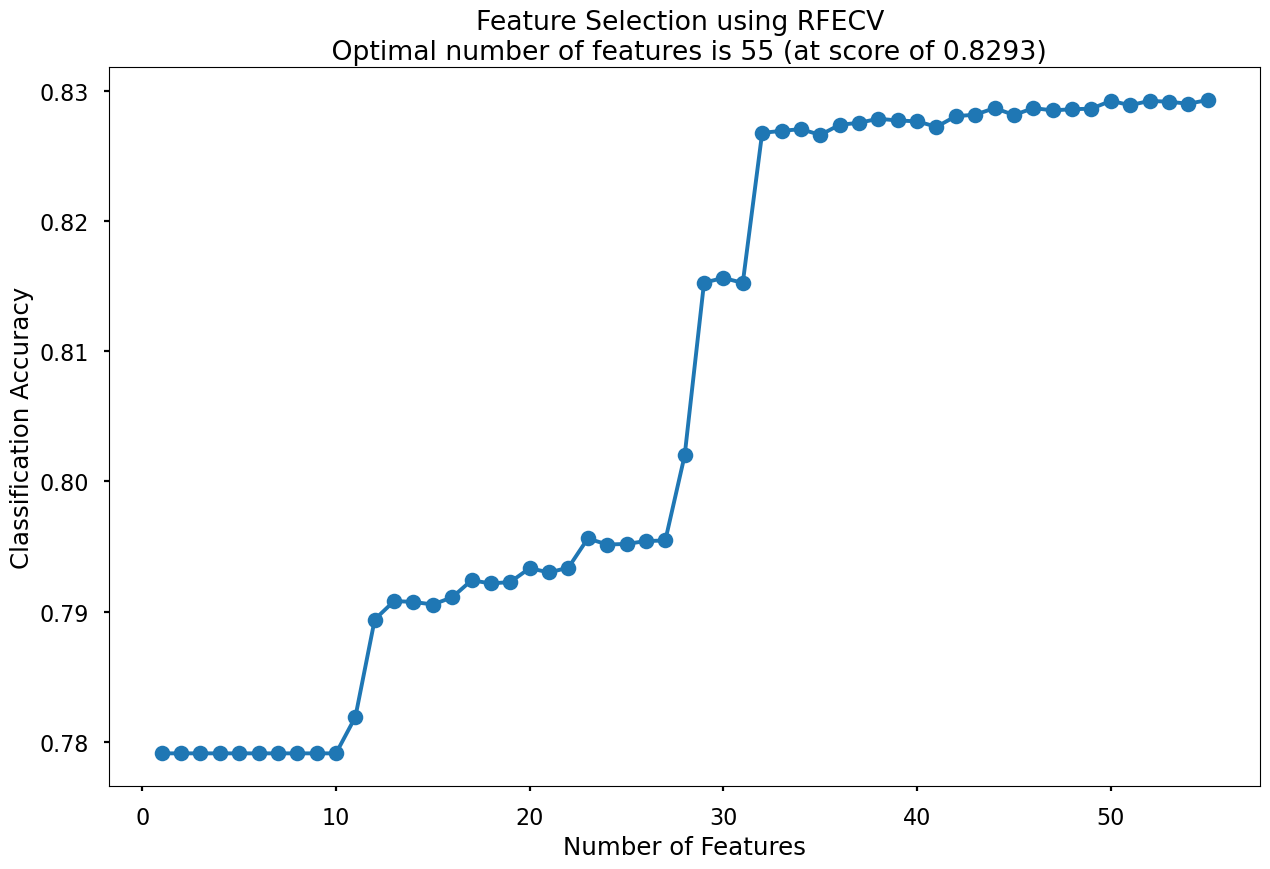

In [16]:
plt.style.use('seaborn-poster')
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Classification Accuracy")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFECV \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.show()


This creates the below plot, which shows us that the highest cross-validated classification accuracy (0.8293) is when we include seven of our original input variables. 

# Model Training

Instantiating and training our Logistic Regression model is done using the below code. We use the random_state parameter to ensure reproducible results, meaning any refinements can be compared to past results. We also specify max_iter = 1000 to allow the solver more attempts at finding an optimal regression line, as the default value of 100 was not enough.

In [17]:
# instantiate our model object
clf = LogisticRegression(random_state = 42, max_iter = 1000)

# fit our model using our training & test sets
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

# Model Performance Assessment
# Predict On The Test Set

To assess how well our model is predicting on new data - we use the trained model object (here called clf) and ask it to predict the signup_flag variable for the test set.

In the code below we create one object to hold the binary 1/0 predictions, and another to hold the actual prediction probabilities for the positive class.

In [18]:
# predict on the test set
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Confusion Matrix

A Confusion Matrix provides us a visual way to understand how our predictions match up against the actual values for those test set observations.

The below code creates the Confusion Matrix using the confusion_matrix functionality from within scikit-learn and then plots it using matplotlib.

C:\Users\David Agogo\AppData\Local\Temp\ipykernel_47112\1662913006.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


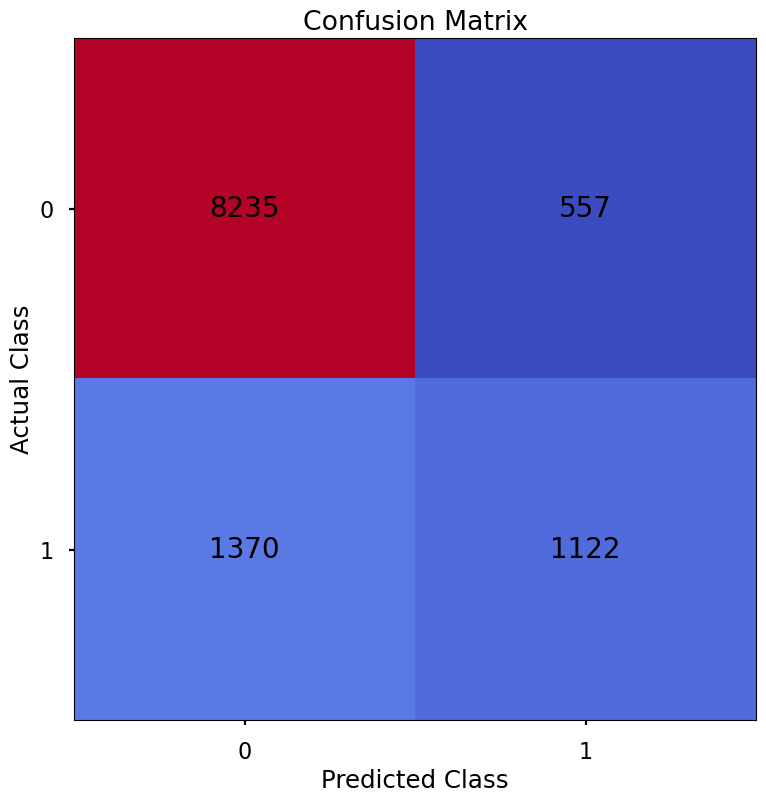

In [19]:
# create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# plot the confusion matrix
plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i, j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j, i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()


The aim is to have a high proportion of observations falling into the top left cell (predicted non-signup and actual non-signup) and the bottom right cell (predicted signup and actual signup).

Since the proportion of signups in our data was around 30:70 we will next analyse not only Classification Accuracy, but also Precision, Recall, and F1-Score which will help us assess how well our model has performed in reality.

# Classification Performance Metrics

# Classification Accuracy

Classification Accuracy is a metric that tells us of all predicted observations, what proportion did we correctly classify. This is very intuitive, but when dealing with imbalanced classes, can be misleading.

An example of this could be a rare disease. A model with a 98% Classification Accuracy on might appear like a fantastic result, but if our data contained 98% of patients without the disease, and 2% with the disease - then a 98% Classification Accuracy could be obtained simply by predicting that no one has the disease - which wouldn’t be a great model in the real world. Luckily, there are other metrics which can help us!

In this example of the rare disease, we could define Classification Accuracy as of all predicted patients, what proportion did we correctly classify as either having the disease, or not having the disease

# Precision & Recall

Precision & Recall

Precision is a metric that tells us of all observations that were predicted as positive, how many actually were positive

Keeping with the rare disease example, Precision would tell us of all patients we predicted to have the disease, how many actually did

Recall is a metric that tells us of all positive observations, how many did we predict as positive

Again, referring to the rare disease example, Recall would tell us of all patients who actually had the disease, how many did we correctly predict

The tricky thing about Precision & Recall is that it is impossible to optimise both - it’s a zero-sum game. If you try to increase Precision, Recall decreases, and vice versa. Sometimes however it will make more sense to try and elevate one of them, in spite of the other. In the case of our rare-disease prediction like we’ve used in our example, perhaps it would be more important to optimise for Recall as we want to classify as many positive cases as possible. In saying this however, we don’t want to just classify every patient as having the disease, as that isn’t a great outcome either!

So - there is one more metric we will discuss & calculate, which is actually a combination of both…


# F1 Score

F1-Score is a metric that essentially “combines” both Precision & Recall. Technically speaking, it is the harmonic mean of these two metrics. A good, or high, F1-Score comes when there is a balance between Precision & Recall, rather than a disparity between them.

Overall, optimising your model for F1-Score means that you’ll get a model that is working well for both positive & negative classifications rather than skewed towards one or the other. To return to the rare disease predictions, a high F1-Score would mean we’ve got a good balance between successfully predicting the disease when it’s present, and not predicting cases where it’s not present.

Using all of these metrics in combination gives a really good overview of the performance of a classification model, and gives us an understanding of the different scenarios & considerations!


In the code below, we utilise in-built functionality from scikit-learn to calculate these four metrics.


In [20]:
# Assuming you have y_test and y_pred_class defined

# classification accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Classification Accuracy: {accuracy:.4f}")

# precision
precision = precision_score(y_test, y_pred_class)
print(f"Precision: {precision:.4f}")

# recall
recall = recall_score(y_test, y_pred_class)
print(f"Recall: {recall:.4f}")

# f1-score
f1 = f1_score(y_test, y_pred_class)
print(f"F1-Score: {f1:.4f}")

Classification Accuracy: 0.8292
Precision: 0.6683
Recall: 0.4502
F1-Score: 0.5380


# Finding The Optimal Classification Threshold

By default, most pre-built classification models & algorithms will just use a 50% probability to discern between a positive class prediction (delivery club signup) and a negative class prediction (delivery club non-signup).

Just because 50% is the default threshold does not mean it is the best one for our task.

Here, we will test many potential classification thresholds, and plot the Precision, Recall & F1-Score, and find an optimal solution!

In [21]:
# set up the list of thresholds to loop through
thresholds = np.arange(0, 1, 0.01)

# create empty lists to append the results to
precision_scores = []
recall_scores = []
f1_scores = []

# loop through each threshold - fit the model - append the results
for threshold in thresholds:
    
    pred_class = (y_pred_prob >= threshold) * 1
    
    precision = precision_score(y_test, pred_class, zero_division = 0)
    precision_scores.append(precision)
    
    recall = recall_score(y_test, pred_class)
    recall_scores.append(recall)
    
    f1 = f1_score(y_test, pred_class)
    f1_scores.append(f1)
    
# extract the optimal f1-score (and it's index)
max_f1 = max(f1_scores)
max_f1_idx = f1_scores.index(max_f1)


C:\Users\David Agogo\AppData\Local\Temp\ipykernel_47112\2490693140.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


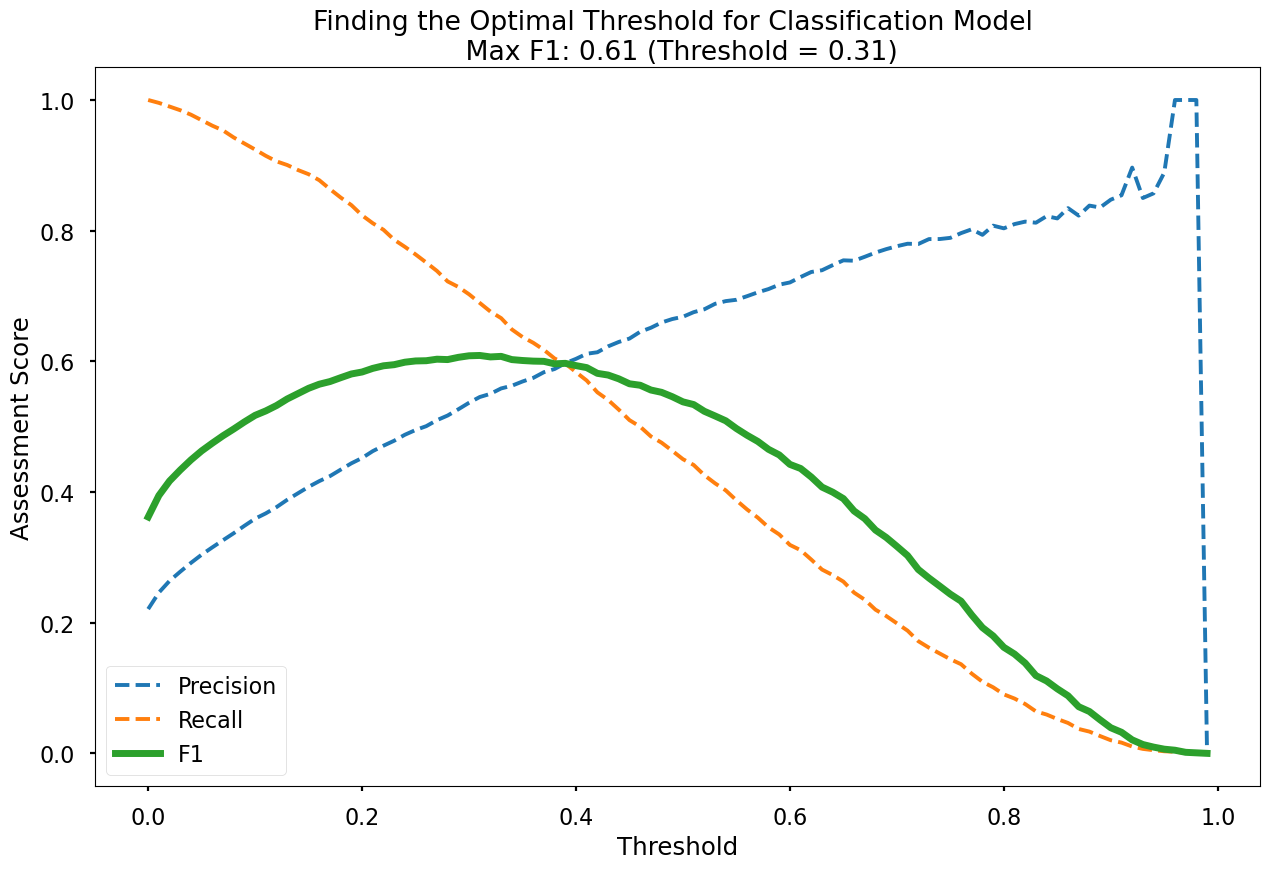

In [22]:
# plot the results
plt.style.use("seaborn-poster")
plt.plot(thresholds, precision_scores, label = "Precision", linestyle = "--")
plt.plot(thresholds, recall_scores, label = "Recall", linestyle = "--")
plt.plot(thresholds, f1_scores, label = "F1", linewidth = 5)
plt.title(f"Finding the Optimal Threshold for Classification Model \n Max F1: {round(max_f1,2)} (Threshold = {round(thresholds[max_f1_idx],2)})")
plt.xlabel("Threshold")
plt.ylabel("Assessment Score")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()



# Decision Tree

We will again utlise the scikit-learn library within Python to model our data using a Decision Tree. The code sections below are broken up into 6 key sections:

Data Import
Data Preprocessing
Model Training
Performance Assessment
Tree Visualisation
Decision Tree Regularisation

# Data Import

Since we saved our modelling data as a csv file, we import it. We ensure we remove the id column, and we also ensure our data is shuffled.

Just like we did for Logistic Regression - our code also investigates the class balance of our dependent variable.

In [23]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder

In [24]:
f_data = pd.read_excel(r"C:\Users\David Agogo\Desktop\AgogoP\machine_failure_data.xlsx")

In [25]:
f_data["Temp_diff"] = f_data.Max_Temp - f_data.Min_Temp 
f_data.head()


,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,RISK_MM,Fail_tomorrow,Temp_diff
0,2008-12-01,3,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,9.5
1,2008-12-02,3,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,17.7
2,2008-12-03,3,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.8
3,2008-12-04,3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,18.8
4,2008-12-05,3,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,14.8


In [26]:
f_data = f_data.dropna()

# Mathematical Transforms
Relationships among numerical features are often expressed through mathematical formulas, which you'll frequently come across as part of your domain research. In Pandas, you can apply arithmetic operations to columns just as if they were ordinary numbers.

In [27]:
# Assuming df is your DataFrame with the "Date" column
f_data['Date'] = pd.to_datetime(f_data['Date'])  # Convert the "Date" column to datetime format

# Split "Date" into "month" and "day"
f_data['Month'] = f_data['Date'].dt.month
f_data['Day'] = f_data['Date'].dt.day


# Split Out Data For Modelling

In exactly the same way we did for Logistic Regression, in the next code block we do two things, we firstly split our data into an X object which contains only the predictor variables, and a y object that contains only our dependent variable.

Once we have done this, we split our data into training and test sets to ensure we can fairly validate the accuracy of the predictions on data that was not used in training. In this case, we have allocated 80% of the data for training, and the remaining 20% for validation. Again, we make sure to add in the stratify parameter to ensure that both our training and test sets have the same proportion of customers who did, and did not, sign up for the delivery club - meaning we can be more confident in our assessment of predictive performance.

In [28]:
f_data['Failure_today'] = f_data['Failure_today'].map({'Yes': 1, 'No': 0})
y = f_data.Failure_today
f_data_features = ['Temp_diff', 'Parameter3_9am', 'Parameter3_3pm', 'Parameter4_9am',
       'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm','Parameter7_9am', 'Parameter7_3pm','Month','Day']

X = f_data[f_data_features]

# split out training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Model Training

Instantiating and training our Decision Tree model is done using the below code. We use the random_state parameter to ensure we get reproducible results, and this helps us understand any improvements in performance with changes to model hyperparameters.

In [29]:
# instantiate our model object
clf = DecisionTreeClassifier(random_state = 42, max_depth = 5)

# fit our model using our training & test sets
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# Model Performance Assessment

# Predict On The Test Set

Just like we did with Logistic Regression, to assess how well our model is predicting on new data - we use the trained model object (here called clf) and ask it to predict the signup_flag variable for the test set.

In the code below we create one object to hold the binary 1/0 predictions, and another to hold the actual prediction probabilities for the positive class.

In [30]:
# predict on the test set
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Confusion Matrix

As we discussed in the above section applying Logistic Regression - a Confusion Matrix provides us a visual way to understand how our predictions match up against the actual values for those test set observations.

The below code creates the Confusion Matrix using the confusion_matrix functionality from within scikit-learn and then plots it using matplotlib.

C:\Users\David Agogo\AppData\Local\Temp\ipykernel_47112\734593898.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


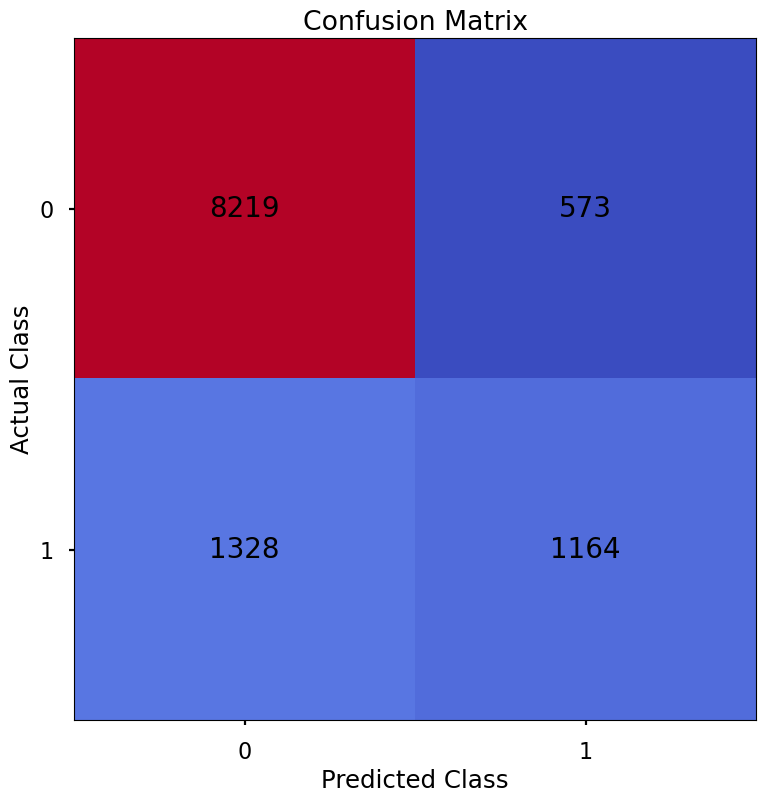

In [31]:
# create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# plot the confusion matrix
plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i, j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j, i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

The aim is to have a high proportion of observations falling into the top left cell (predicted non-signup and actual non-signup) and the bottom right cell (predicted signup and actual signup).

Since the proportion of signups in our data was around 30:70 we will again analyse not only Classification Accuracy, but also Precision, Recall, and F1-Score as they will help us assess how well our model has performed from different points of view.

#  Classification Performance Metrics

#  Accuracy, Precision, Recall, F1-Score


For details on these performance metrics, please see the above section on Logistic Regression. Using all four of these metrics in combination gives a really good overview of the performance of a classification model, and gives us an understanding of the different scenarios & considerations!

In the code below, we utilise in-built functionality from scikit-learn to calculate these four metrics.

In [32]:
# Assuming you have y_test and y_pred_class defined

# classification accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Classification Accuracy: {accuracy:.4f}")

# precision
precision = precision_score(y_test, y_pred_class)
print(f"Precision: {precision:.4f}")

# recall
recall = recall_score(y_test, y_pred_class)
print(f"Recall: {recall:.4f}")

# f1-score
f1 = f1_score(y_test, y_pred_class)
print(f"F1-Score: {f1:.4f}")


Classification Accuracy: 0.8315
Precision: 0.6701
Recall: 0.4671
F1-Score: 0.5505


# Visualise Our Decision Tree

To see the decisions that have been made in the tree, we can use the plot_tree functionality that we imported from scikit-learn. To do this, we use the below code:

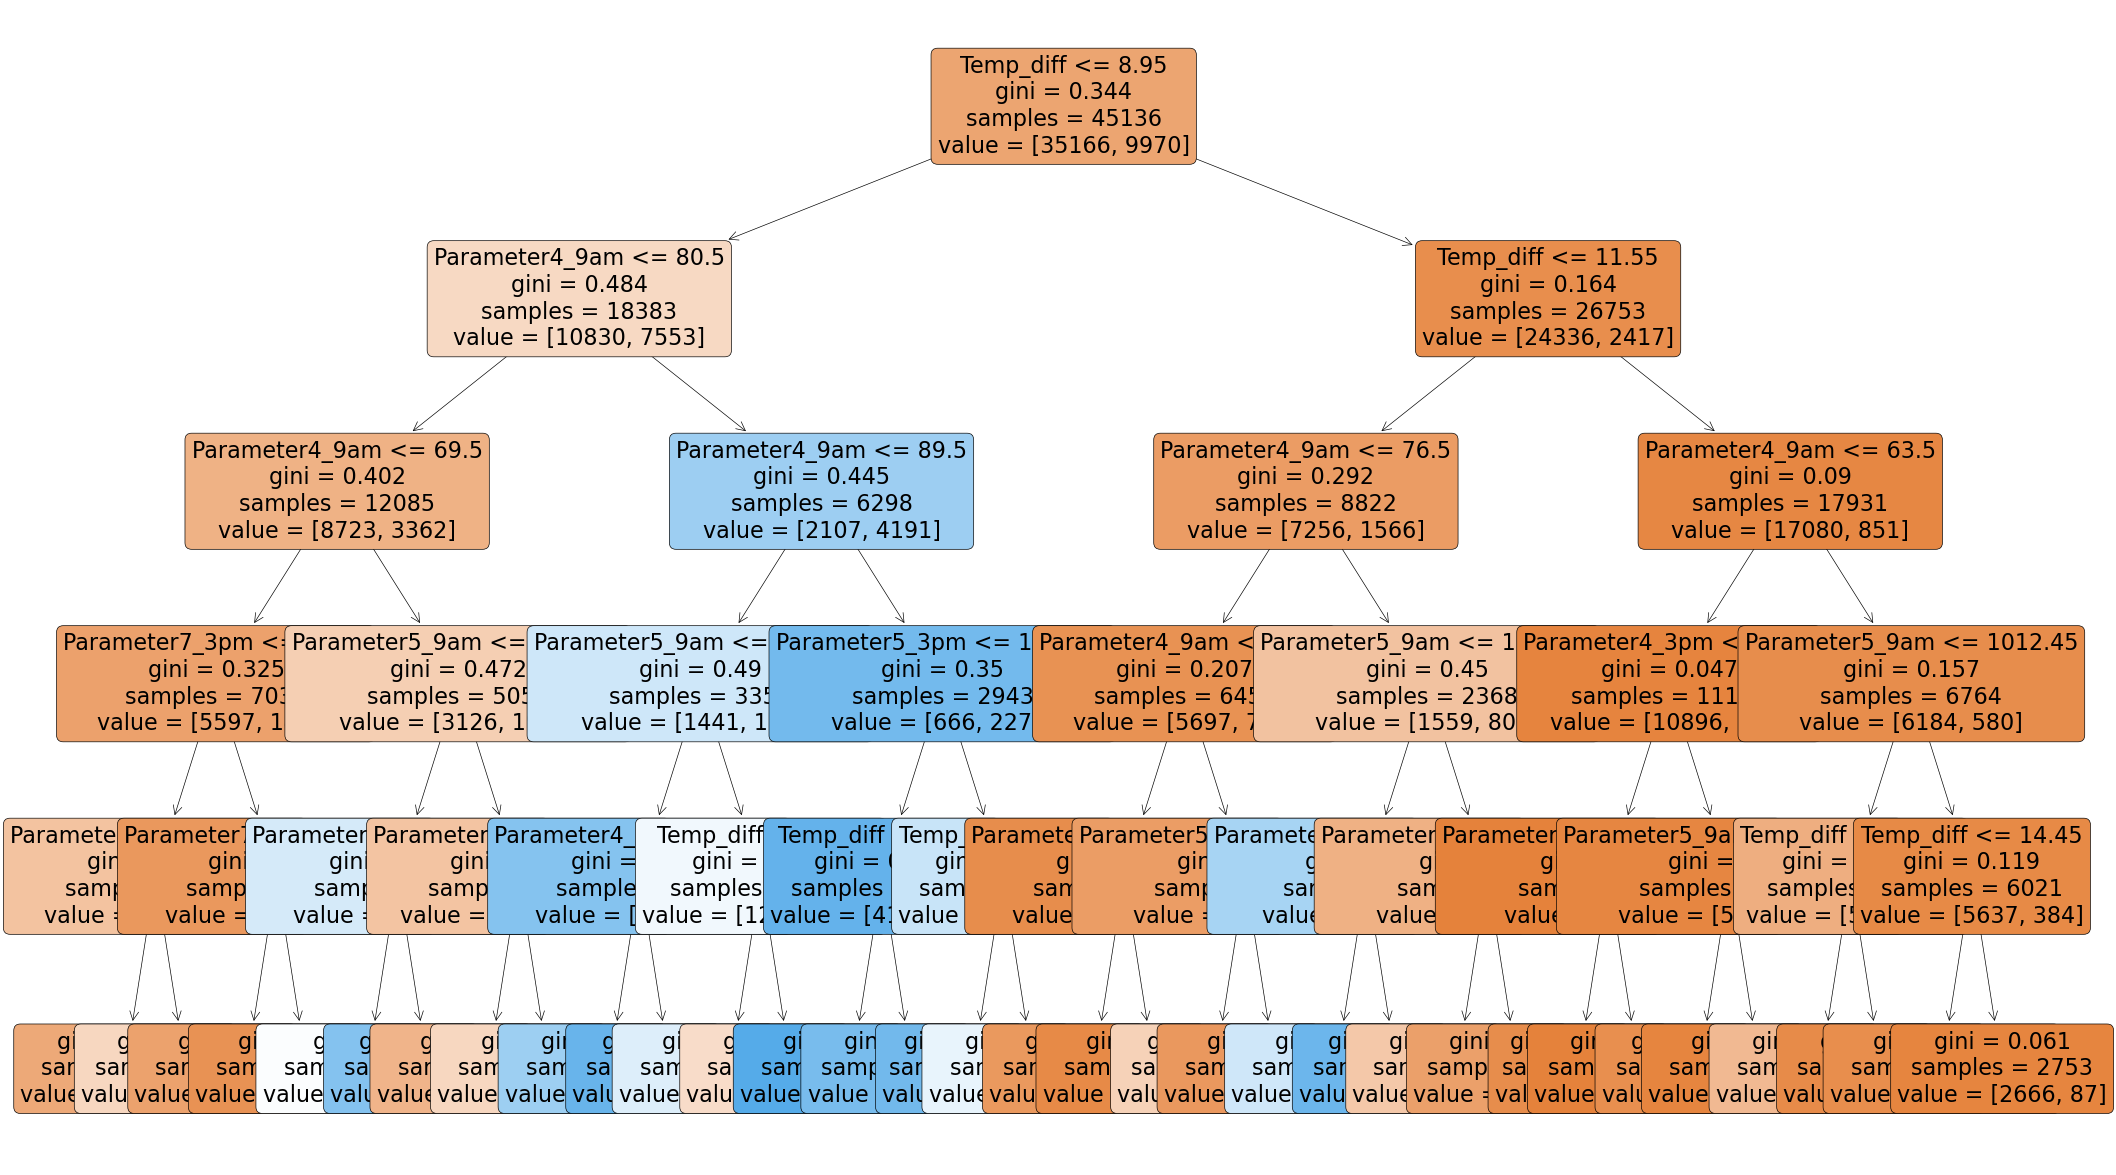

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your decision tree classifier
plt.figure(figsize=(25, 15))

# Convert Index to list
feature_names_list = X.columns.tolist()

# Plot the single tree
plot_tree(clf, filled=True, rounded=True, feature_names=feature_names_list, fontsize=16)

# Show or save the plot
plt.show()


This is a very powerful visual, and one that can be shown to engineers in industry to ensure they understand exactly what is driving the predictions.

One interesting thing to note is that the very first split appears to be using the variable distance from store so it would seem that this is a very important variable when it comes to predicting whether the machine fails today

# Decision Tree Regularisation

Decision Tree’s can be prone to over-fitting, in other words, without any limits on their splitting, they will end up learning the training data perfectly. We would much prefer our model to have a more generalised set of rules, as this will be more robust & reliable when making predictions on new data.

One effective method of avoiding this over-fitting, is to apply a max depth to the Decision Tree, meaning we only allow it to split the data a certain number of times before it is required to stop.

We initially trained our model with a placeholder depth of 5, but unfortunately, we don’t necessarily know the optimal number for this. Below we will loop over a variety of values and assess which gives us the best predictive performance!




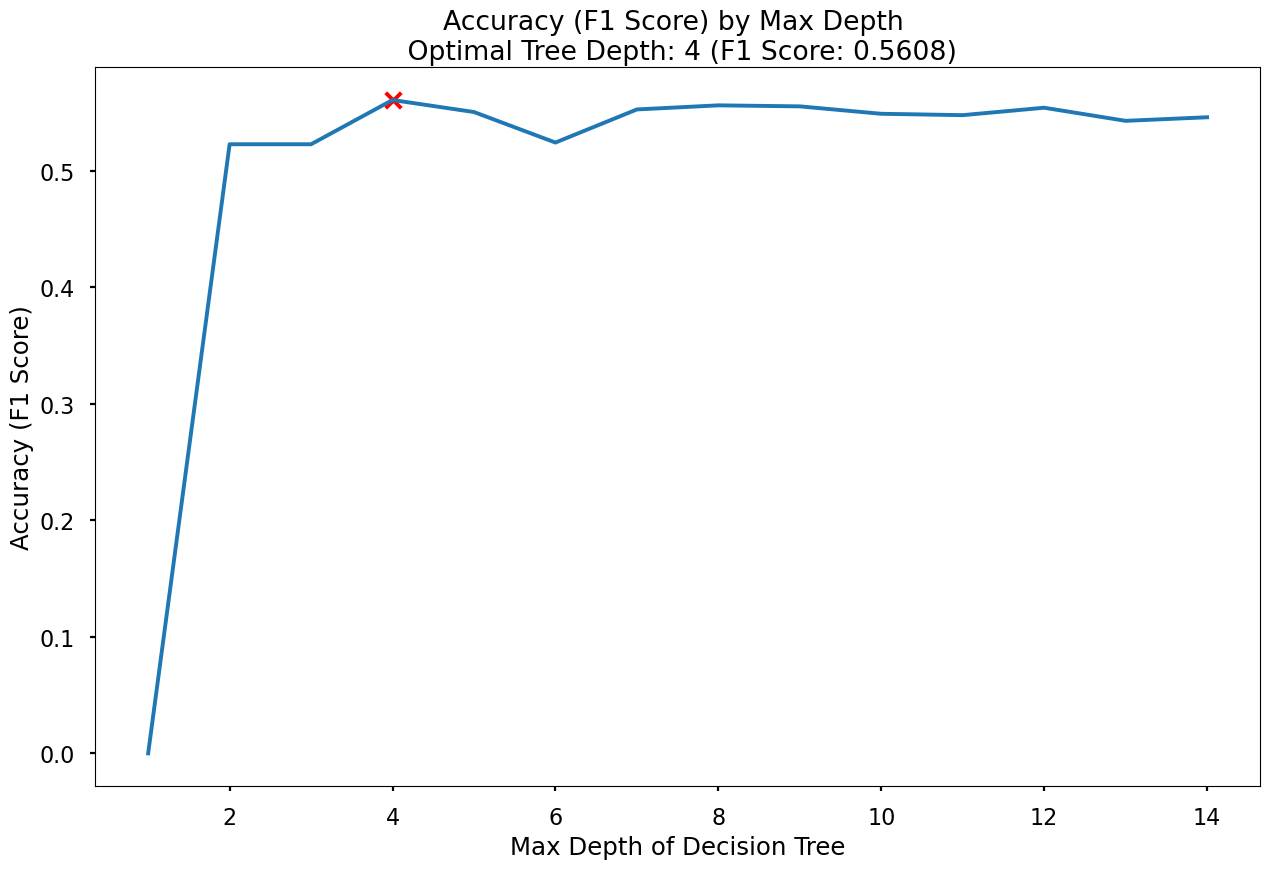

In [34]:
# finding the best max_depth

# set up range for search, and empty list to append accuracy scores to
max_depth_list = list(range(1,15))
accuracy_scores = []

# loop through each possible depth, train and validate model, append test set f1-score
for depth in max_depth_list:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = f1_score(y_test,y_pred)
    accuracy_scores.append(accuracy)
    
# store max accuracy, and optimal depth    
max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_idx]

# plot accuracy by max depth
plt.plot(max_depth_list,accuracy_scores)
plt.scatter(optimal_depth, max_accuracy, marker = "x", color = "red")
plt.title(f"Accuracy (F1 Score) by Max Depth \n Optimal Tree Depth: {optimal_depth} (F1 Score: {round(max_accuracy,4)})")
plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Accuracy (F1 Score)")
plt.tight_layout()
plt.show()


In the plot we can see that the maximum F1-Score on the test set is found when applying a max_depth value of 4 which takes our F1-Score up to 0.5608

# Random Forest

We will again utlise the scikit-learn library within Python to model our data using a Random Forest. The code sections below are broken up into 4 key sections:

* Data Import
* Data Preprocessing
* Model Training
* Performance Assessment

# Data Import

As this is the exact same process we ran for both Logistic Regression & the Decision Tree - our code also investigates the class balance of our dependent variable


In [35]:
# import required packages
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance




# Model Training

Instantiating and training our Random Forest model is done using the below code. We use the random_state parameter to ensure we get reproducible results, and this helps us understand any improvements in performance with changes to model hyperparameters.

We also look to build more Decision Trees in the Random Forest (500) than would be done using the default value of 100.

Lastly, since the default scikit-learn implementation of Random Forests does not limit the number of randomly selected variables offered up for splitting at each split point in each Decision Tree - we put this in place using the max_features parameter. This can always be refined later through testing, or through an approach such as gridsearch.

In [36]:
# instantiate our model object
clf = RandomForestClassifier(random_state = 42, n_estimators = 500, max_features = 5)

# fit our model using our training & test sets
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500, random_state=42)

# Model Performance Assessment

# Predict On The Test Set

Just like we did with Logistic Regression & our Decision Tree, to assess how well our model is predicting on new data - we use the trained model object (here called clf) and ask it to predict the signup_flag variable for the test set.

In the code below we create one object to hold the binary 1/0 predictions, and another to hold the actual prediction probabilities for the positive class.

In [37]:
# predict on the test set
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]


# Confusion Matrix

As we discussed in the above sections - a Confusion Matrix provides us a visual way to understand how our predictions match up against the actual values for those test set observations.

The below code creates the Confusion Matrix using the confusion_matrix functionality from within scikit-learn and then plots it using matplotlib.

C:\Users\David Agogo\AppData\Local\Temp\ipykernel_47112\734593898.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


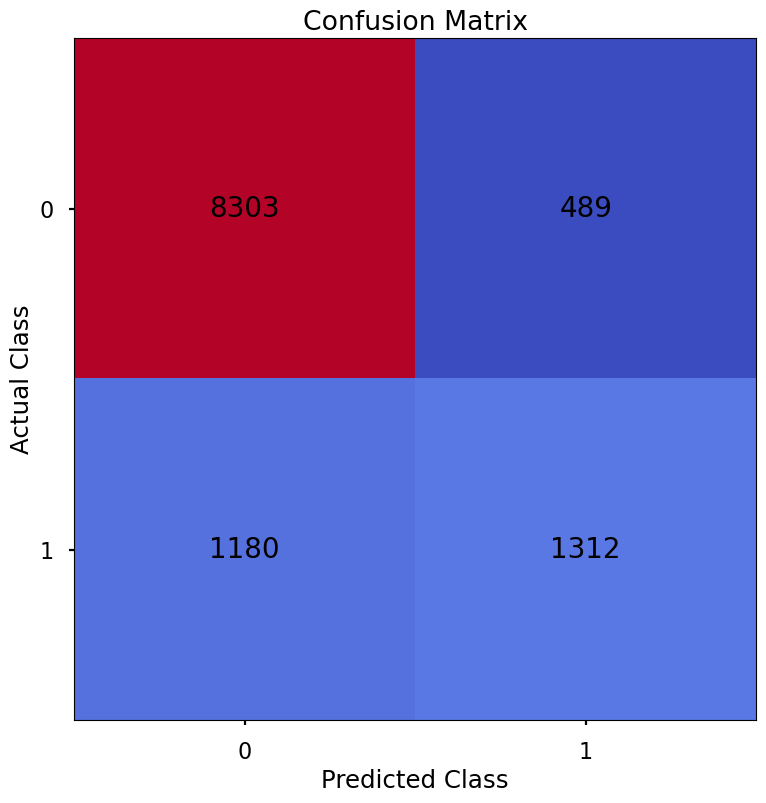

In [38]:
# create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# plot the confusion matrix
plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i, j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j, i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

The aim is to have a high proportion of observations falling into the top left cell (predicted non-signup and actual non-signup) and the bottom right cell (predicted signup and actual signup).

Since the proportion of signups in our data was around 30:70 we will again analyse not only Classification Accuracy, but also Precision, Recall, and F1-Score as they will help us assess how well our model has performed from different points of view.

# Classification Performance Metrics

# Accuracy, Precision, Recall, F1-Score

For details on these performance metrics, please see the above section on Logistic Regression. Using all four of these metrics in combination gives a really good overview of the performance of a classification model, and gives us an understanding of the different scenarios & considerations!

In the code below, we utilise in-built functionality from scikit-learn to calculate these four metrics.

In [39]:
# Assuming you have y_test and y_pred_class defined

# classification accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Classification Accuracy: {accuracy:.4f}")

# precision
precision = precision_score(y_test, y_pred_class)
print(f"Precision: {precision:.4f}")

# recall
recall = recall_score(y_test, y_pred_class)
print(f"Recall: {recall:.4f}")

# f1-score
f1 = f1_score(y_test, y_pred_class)
print(f"F1-Score: {f1:.4f}")

Classification Accuracy: 0.8521
Precision: 0.7285
Recall: 0.5265
F1-Score: 0.6112


# Feature Importance

Random Forests are an ensemble model, made up of many, many Decision Trees, each of which is different due to the randomness of the data being provided, and the random selection of input variables available at each potential split point.

Because of this, we end up with a powerful and robust model, but because of the random or different nature of all these Decision trees - the model gives us a unique insight into how important each of our input variables are to the overall model.

As we’re using random samples of data, and input variables for each Decision Tree - there are many scenarios where certain input variables are being held back and this enables us a way to compare how accurate the models predictions are if that variable is or isn’t present.

So, at a high level, in a Random Forest we can measure importance by asking How much would accuracy decrease if a specific input variable was removed or randomised?

If this decrease in performance, or accuracy, is large, then we’d deem that input variable to be quite important, and if we see only a small decrease in accuracy, then we’d conclude that the variable is of less importance.

At a high level, there are two common ways to tackle this. The first, often just called Feature Importance is where we find all nodes in the Decision Trees of the forest where a particular input variable is used to split the data and assess what the gini impurity score (for a Classification problem) was before the split was made, and compare this to the gini impurity score after the split was made. We can take the average of these improvements across all Decision Trees in the Random Forest to get a score that tells us how much better we’re making the model by using that input variable.

If we do this for each of our input variables, we can compare these scores and understand which is adding the most value to the predictive power of the model!

The other approach, often called Permutation Importance cleverly uses some data that has gone unused at when random samples are selected for each Decision Tree (this stage is called “bootstrap sampling” or “bootstrapping”)

These observations that were not randomly selected for each Decision Tree are known as Out of Bag observations and these can be used for testing the accuracy of each particular Decision Tree.

For each Decision Tree, all of the Out of Bag observations are gathered and then passed through. Once all of these observations have been run through the Decision Tree, we obtain a classification accuracy score for these predictions.

In order to understand the importance, we randomise the values within one of the input variables - a process that essentially destroys any relationship that might exist between that input variable and the output variable - and run that updated data through the Decision Tree again, obtaining a second accuracy score. The difference between the original accuracy and the new accuracy gives us a view on how important that particular variable is for predicting the output.

Permutation Importance is often preferred over Feature Importance which can at times inflate the importance of numerical features. Both are useful, and in most cases will give fairly similar results.

Let’s put them both in place, and plot the results.

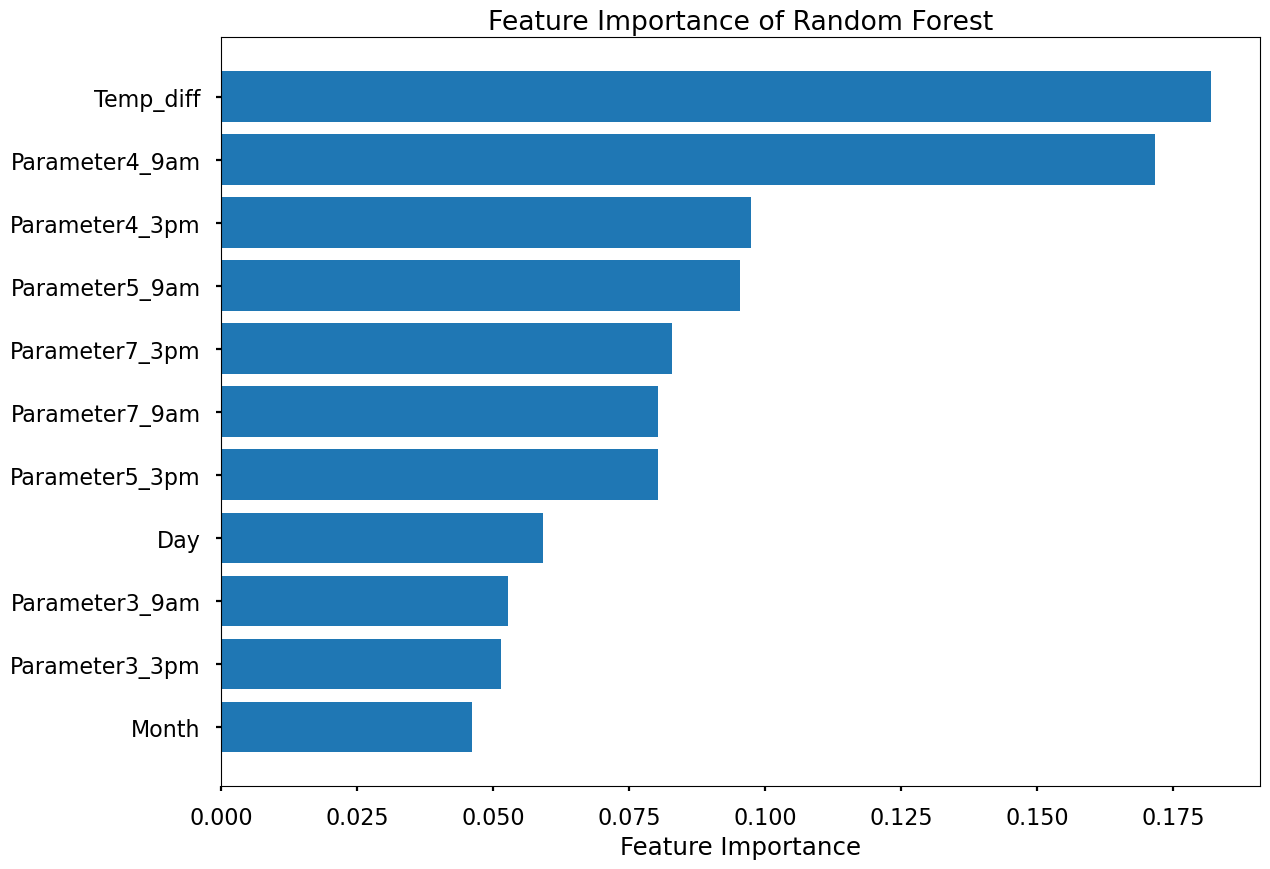

In [40]:
# calculate feature importance
feature_importance = pd.DataFrame(clf.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names,feature_importance], axis = 1)
feature_importance_summary.columns = ["input_variable","feature_importance"]
feature_importance_summary.sort_values(by = "feature_importance", inplace = True)

# plot feature importance
plt.barh(feature_importance_summary["input_variable"],feature_importance_summary["feature_importance"])
plt.title("Feature Importance of Random Forest")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()



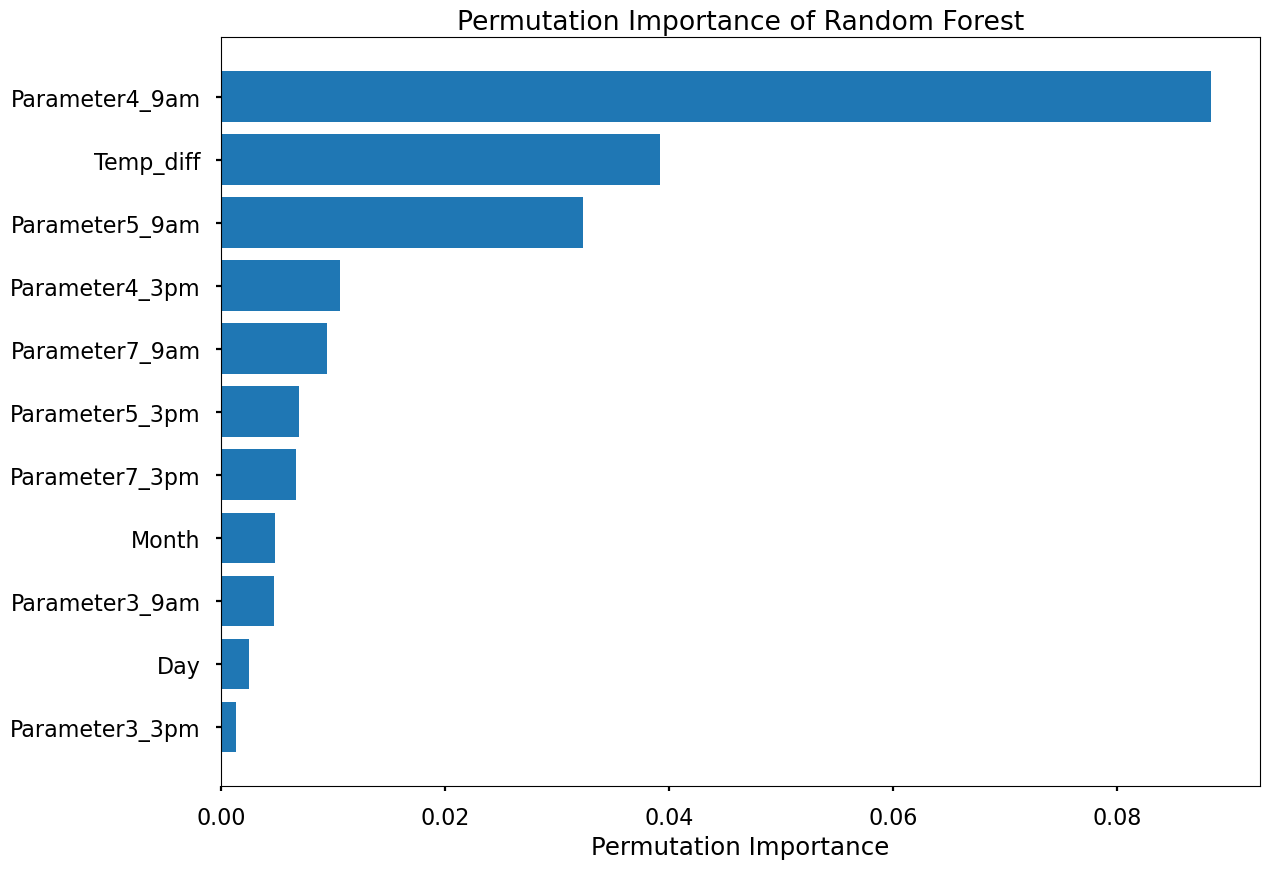

In [41]:
# calculate permutation importance
result = permutation_importance(clf, X_test, y_test, n_repeats = 10, random_state = 42)
permutation_importance = pd.DataFrame(result["importances_mean"])
feature_names = pd.DataFrame(X.columns)
permutation_importance_summary = pd.concat([feature_names,permutation_importance], axis = 1)
permutation_importance_summary.columns = ["input_variable","permutation_importance"]
permutation_importance_summary.sort_values(by = "permutation_importance", inplace = True)

# plot permutation importance
plt.barh(permutation_importance_summary["input_variable"],permutation_importance_summary["permutation_importance"])
plt.title("Permutation Importance of Random Forest")
plt.xlabel("Permutation Importance")
plt.tight_layout()
plt.show()

The overall story from both approaches is very similar, in that by far, the most important or impactful input variables are distance_from_store and transaction_count

Surprisingly, average_basket_size was not as important as hypothesised.

There are slight differences in the order or “importance” for the remaining variables but overall they have provided similar findings.

# K Nearest Neighbours

We utlise the scikit-learn library within Python to model our data using KNN. The code sections below are broken up into 5 key sections:

* Data Import
* Data Preprocessing
* Model Training
* Performance Assessment
* Optimal Value For K

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

# Assuming you have already defined X and y

# split out training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Feature Scaling

As KNN is a distance based algorithm, in other words it is reliant on an understanding of how similar or different data points are across different dimensions in n-dimensional space, the application of Feature Scaling is extremely important.

Feature Scaling is where we force the values from different columns to exist on the same scale, in order to enchance the learning capabilities of the model. There are two common approaches for this, Standardisation, and Normalisation.

Standardisation rescales data to have a mean of 0, and a standard deviation of 1 - meaning most datapoints will most often fall between values of around -4 and +4.

Normalisation rescales datapoints so that they exist in a range between 0 and 1.

The below code uses the in-built MinMaxScaler functionality from scikit-learn to apply Normalisation to all of our input variables. The reason we choose Normalisation over Standardisation is that our scaled data will all exist between 0 and 1, and these will then be compatible with any categorical variables that we have encoded as 1’s and 0’s.

In the code, we also make sure to apply fit_transform to the training set, but only transform to the test set. This means the scaling logic will learn and apply the scaling “rules” from the training data, but only apply them to the test data (or any other data we predict on in the future). This is important in order to avoid data leakage where the test set learns information about the training data, and means we can’t fully trust model performance metrics!

In [43]:
# create our scaler object
scale_norm = MinMaxScaler()

# normalise the training set (using fit_transform)
X_train = pd.DataFrame(scale_norm.fit_transform(X_train), columns=X_train.columns)

# normalise the test set (using transform only)
X_test = pd.DataFrame(scale_norm.transform(X_test), columns=X_test.columns)


#  Feature Selection

As we discussed when applying Logistic Regression above - Feature Selection is the process used to select the input variables that are most important to your Machine Learning task. For more information around this, please see that section above.

When applying KNN, Feature Selection is an interesting topic. The algorithm is measuring the distance between data-points across all dimensions, where each dimension is one of our input variables. The algorithm treats each input variable as equally important, there isn’t really a concept of “feature importance” so the spread of data within an unimportant variable could have an effect on judging other data points as either “close” or “far”. If we had a lot of “unimportant” variables in our data, this could create a lot of noise for the algorithm to deal with, and we’d just see poor classification accuracy without really knowing why.

Having a high number of input variables also means the algorithm has to process a lot more information when processing distances between all of the data-points, so any way to reduce dimensionality is important from a computational perspective as well.

For our task here we are again going to apply Recursive Feature Elimination With Cross Validation (RFECV) which is an approach that starts with all input variables, and then iteratively removes those with the weakest relationships with the output variable. RFECV does this using Cross Validation, so splits the data into many “chunks” and iteratively trains & validates models on each “chunk” seperately. This means that each time we assess different models with different variables included, or eliminated, the algorithm also knows how accurate each of those models was. From the suite of model scenarios that are created, the algorithm can determine which provided the best accuracy, and thus can infer the best set of input variables to use!

In [44]:
# instantiate RFECV & the model type to be utilised
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 42)
feature_selector = RFECV(clf)

# fit RFECV onto our training & test data
fit = feature_selector.fit(X_train,y_train)

# extract & print the optimal number of features
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

# limit our training & test sets to only include the selected variables
X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]

Optimal number of features: 11


The below code then produces a plot that visualises the cross-validated classification accuracy with each potential number of features

C:\Users\David Agogo\AppData\Local\Temp\ipykernel_47112\1991705120.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


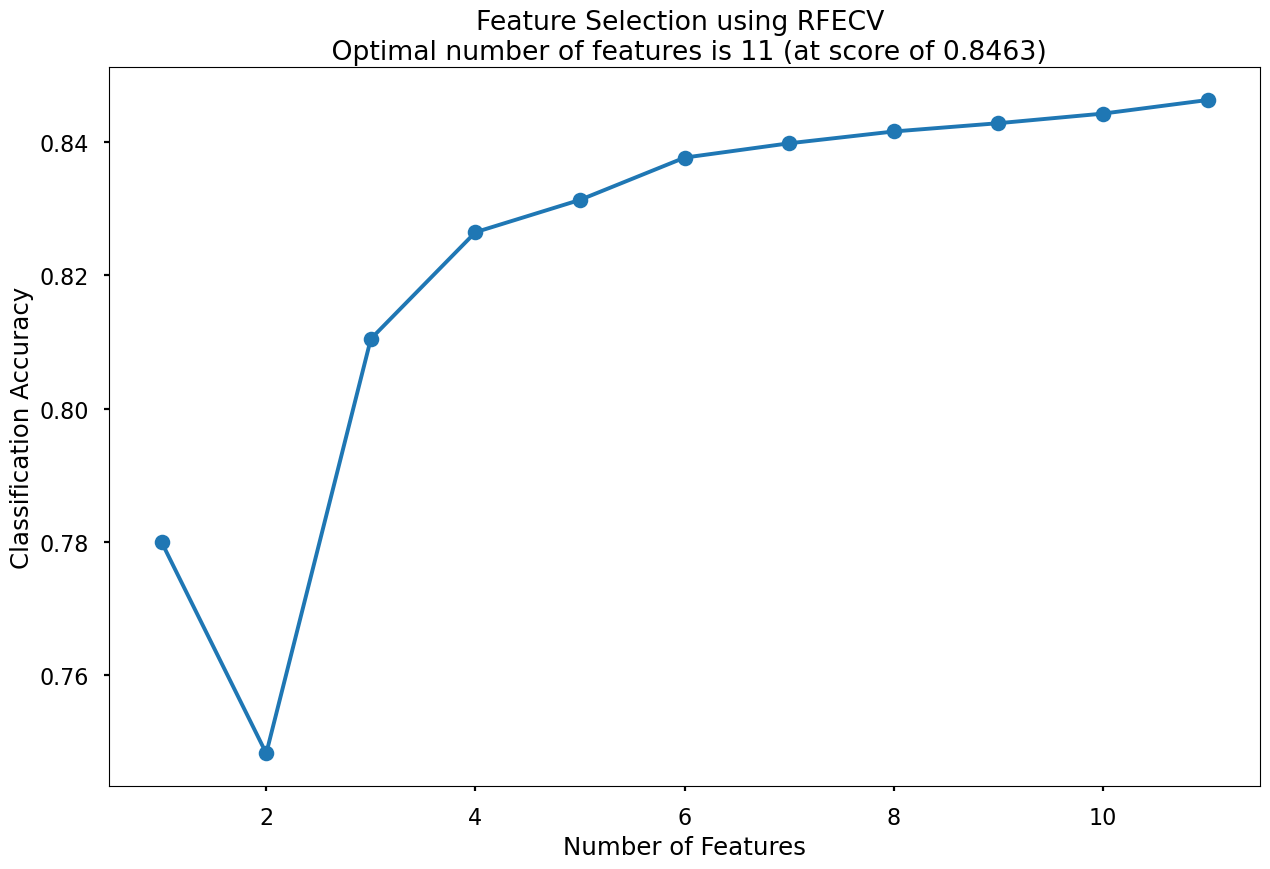

In [45]:
plt.style.use('seaborn-poster')
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Classification Accuracy")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFECV \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.show()


This creates the below plot, which shows us that the highest cross-validated classification accuracy (0.8463) is when we include six of our original input variables - although there isn’t much difference in predictive performance between using three variables through to eight variables - and this syncs with what we saw in the Random Forest section above where only three of the input variables scored highly when assessing Feature Importance & Permutation Importance.

The variables that have been dropped are total_items and credit score - we will continue on with the remaining 11!

# Model Training

Instantiating and training our KNN model is done using the below code. At this stage we will just use the default parameters, meaning that the algorithm:

* Will use a value for k of 5, or in other words it will base classifications based upon the 5 nearest neighbours
* Will use uniform weighting, or in other words an equal weighting to all 5 neighbours regardless of distance

In [46]:
# instantiate our model object
clf = KNeighborsClassifier()

# fit our model using our training & test sets
clf.fit(X_train, y_train)


KNeighborsClassifier()

# Model Performance Assessment

# Predict On The Test Set

To assess how well our model is predicting on new data - we use the trained model object (here called clf) and ask it to predict the signup_flag variable for the test set.

In the code below we create one object to hold the binary 1/0 predictions, and another to hold the actual prediction probabilities for the positive class (which is based upon the majority class within the k nearest neighbours)

In [47]:
# predict on the test set
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]


# Confusion Matrix

As we’ve seen with all models so far, our Confusion Matrix provides us a visual way to understand how our predictions match up against the actual values for those test set observations.

The below code creates the Confusion Matrix using the confusion_matrix functionality from within scikit-learn and then plots it using matplotlib.

C:\Users\David Agogo\AppData\Local\Temp\ipykernel_47112\1662913006.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


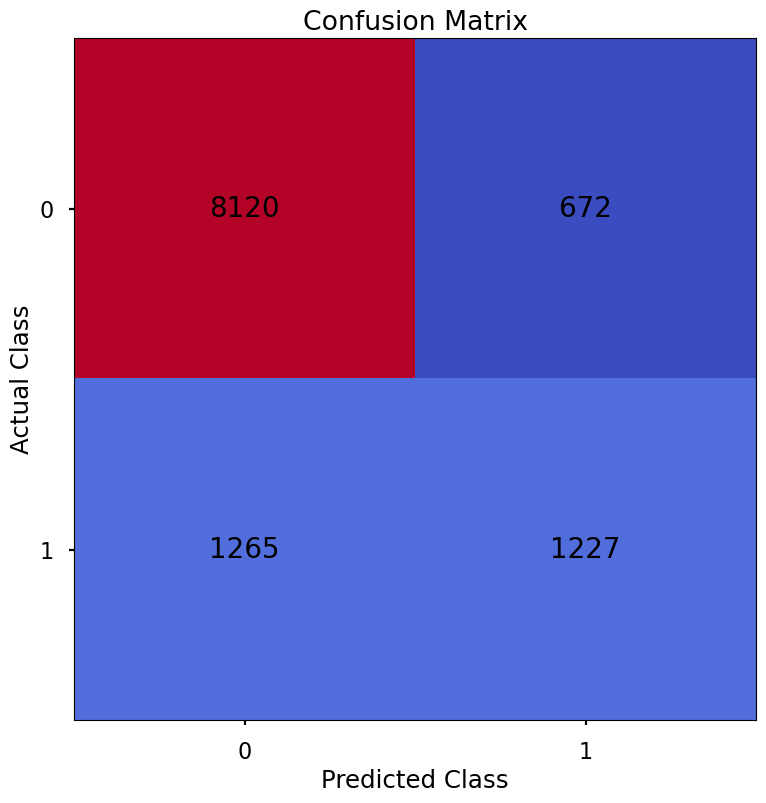

In [48]:
# create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# plot the confusion matrix
plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i, j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j, i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()


The aim is to have a high proportion of observations falling into the top left cell (predicted non-signup and actual non-signup) and the bottom right cell (predicted signup and actual signup).

The results here are interesting - all of the errors are where the model incorrectly classified delivery club signups as non-signups - the model made no errors when classifying non-signups non-signups.

Since the proportion of signups in our data was around 30:70 we will next analyse not only Classification Accuracy, but also Precision, Recall, and F1-Score which will help us assess how well our model has performed in reality.

# Classification Performance Metrics

# Accuracy, Precision, Recall, F1-Score

For details on these performance metrics, please see the above section on Logistic Regression. Using all four of these metrics in combination gives a really good overview of the performance of a classification model, and gives us an understanding of the different scenarios & considerations!

In the code below, we utilise in-built functionality from scikit-learn to calculate these four metrics.

In [49]:
# classification accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Classification Accuracy: {accuracy:.4f}")

# precision
precision = precision_score(y_test, y_pred_class)
print(f"Precision: {precision:.4f}")

# recall
recall = recall_score(y_test, y_pred_class)
print(f"Recall: {recall:.4f}")

# f1-score
f1 = f1_score(y_test, y_pred_class)
print(f"F1-Score: {f1:.4f}")

Classification Accuracy: 0.8283
Precision: 0.6461
Recall: 0.4924
F1-Score: 0.5589


# Finding The Optimal Value For k

By default, the KNN algorithm within scikit-learn will use k = 5 meaning that classifications are based upon the five nearest neighbouring data-points in n-dimensional space.

Just because this is the default threshold does not mean it is the best one for our task.

Here, we will test many potential values for k, and plot the Precision, Recall & F1-Score, and find an optimal solution!

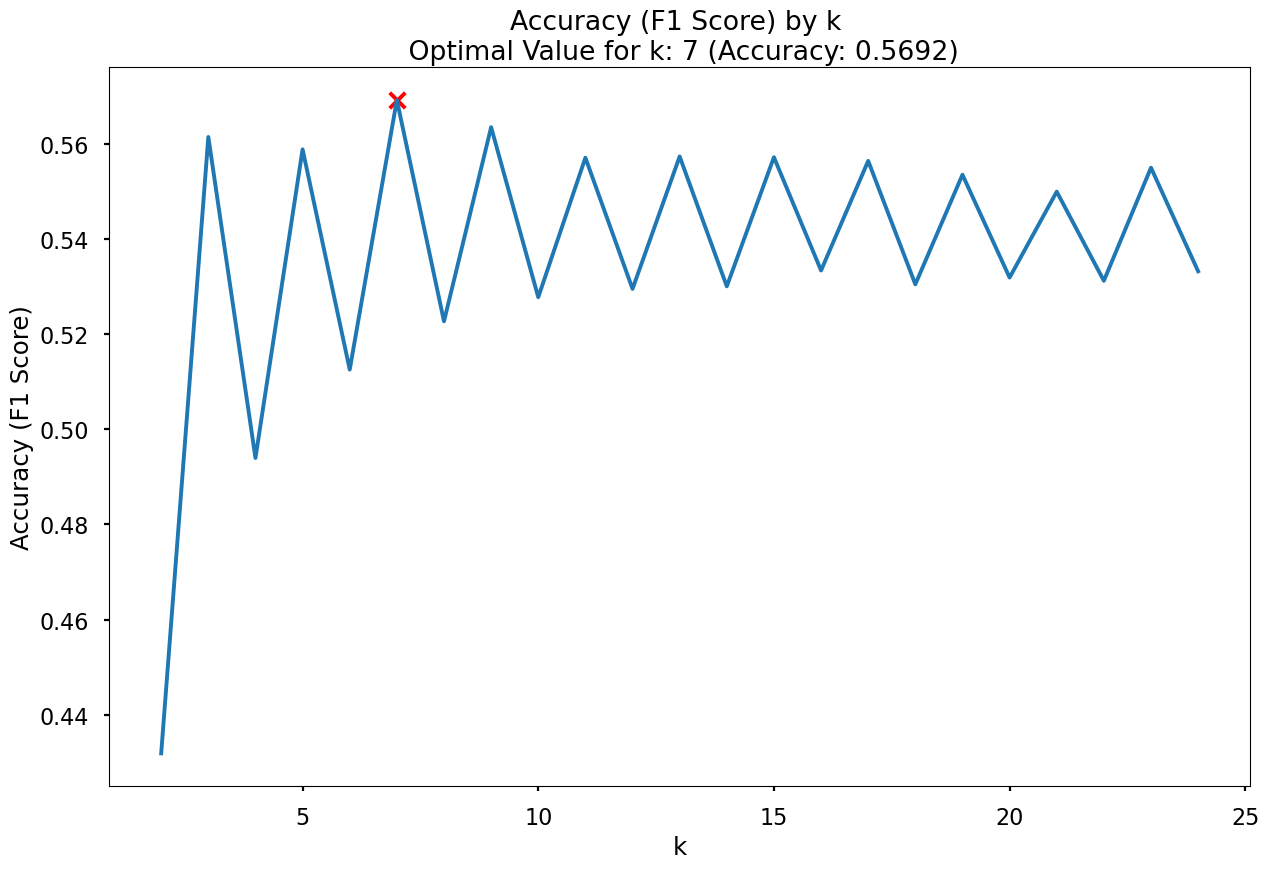

In [50]:
# set up range for search, and empty list to append accuracy scores to
k_list = list(range(2,25))
accuracy_scores = []

# loop through each possible value of k, train and validate model, append test set f1-score
for k in k_list:
    
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = f1_score(y_test,y_pred)
    accuracy_scores.append(accuracy)
    
# store max accuracy, and optimal k value    
max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_k_value = k_list[max_accuracy_idx]

# plot accuracy by max depth
plt.plot(k_list,accuracy_scores)
plt.scatter(optimal_k_value, max_accuracy, marker = "x", color = "red")
plt.title(f"Accuracy (F1 Score) by k \n Optimal Value for k: {optimal_k_value} (Accuracy: {round(max_accuracy,4)})")
plt.xlabel("k")
plt.ylabel("Accuracy (F1 Score)")
plt.tight_layout()
plt.show()

In the plot we can see that the maximum F1-Score on the test set is found when applying a k value of 5 - which is exactly what we started with, so nothing needs to change!
